## Observations and Insights

## Dependencies and starter code

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
df1=pd.merge(mouse_metadata, study_results, on='Mouse ID')
df = df1.loc[df1['Timepoint']==20,:]
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
4,k403,Ramicane,Male,21,16,20,32.997729,1
14,s185,Capomulin,Female,3,17,20,36.866876,0
24,x401,Capomulin,Female,16,15,20,36.065835,0
34,m601,Capomulin,Male,22,17,20,34.255732,1
44,g791,Ramicane,Male,11,16,20,41.211897,0


In [20]:
average.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872
Naftisol,12.000000,27.166667,19.623656,54.331565,1.182796


## Summary statistics

In [104]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
average = df['Tumor Volume (mm3)'].groupby(df['Drug Regimen']).mean()
median = df['Tumor Volume (mm3)'].groupby(df['Drug Regimen']).median()
variance =df['Tumor Volume (mm3)'].groupby(df['Drug Regimen']).var()
std_dev = df['Tumor Volume (mm3)'].groupby(df['Drug Regimen']).std()
sem = df['Tumor Volume (mm3)'].groupby(df['Drug Regimen']).sem()
summary = pd.merge(average, median, on= 'Drug Regimen', suffixes=(' Mean',' Median'))
summary = pd.merge(summary, variance, on= 'Drug Regimen')
summary = summary.rename(columns={'Tumor Volume (mm3)':'Variance'})
summary = pd.merge(summary,std_dev, on='Drug Regimen')
summary = summary.rename(columns={'Tumor Volume (mm3)':'Std. Dev.'})
summary = pd.merge(summary,sem, on='Drug Regimen')
summary = summary.rename(columns={'Tumor Volume (mm3)':'SEM'})
summary.head(30)

,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Variance,Std. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.716325,40.716428,19.035028,4.362915,0.909731
Ceftamin,52.157049,52.112973,2.326097,1.525155,0.359482
Infubinol,53.197691,53.862724,4.535510,2.129674,0.476210
Ketapril,54.920935,54.250054,10.027796,3.166670,0.726484
Naftisol,53.644087,52.855576,7.086694,2.662084,0.595260
Placebo,54.364417,53.006865,13.393928,3.659772,0.839609
Propriva,53.346737,53.744734,5.239840,2.289070,0.555181
Ramicane,40.238325,40.772803,14.216521,3.770480,0.786199
Stelasyn,53.970080,53.983436,8.906693,2.984408,0.684670


## Bar plots

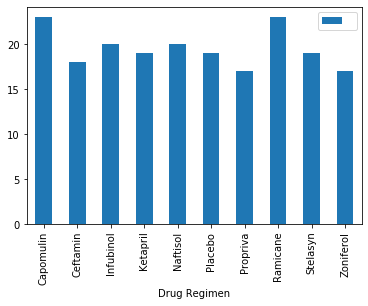

In [114]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
counts = df.groupby(['Drug Regimen']).count()
counts.reindex()
counts.head()
countsplt = counts[['Mouse ID']]
countsplt=countsplt.rename(columns = {'Mouse ID':' '})
countsplt.plot(kind='bar')

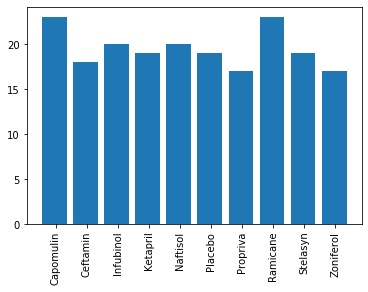

In [115]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
xval = np.arange(0,len(counts))
tick_locations = [x+.04 for x in xval]
plt.bar(xval,counts['Mouse ID'])
plt.xticks(tick_locations, counts.index, rotation="vertical")
plt.show()

## Pie plots

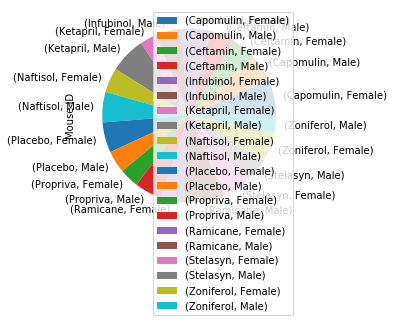

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = df.groupby(['Drug Regimen','Sex']).count()
#del gender['Drug Regimen']
del gender['Age_months']
del gender['Weight (g)']
del gender['Timepoint']
del gender['Tumor Volume (mm3)']
del gender['Metastatic Sites']
plot = gender.plot.pie(subplots=True)

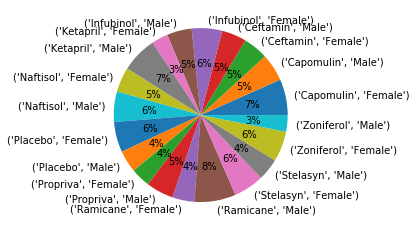

In [105]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender['Mouse ID'], labels = gender.index,autopct="%1.0f%%")
plt.show()

## Quartiles, outliers and boxplots

In [116]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
Capomulin = df.loc[df['Drug Regimen']=='Capomulin',:]
Ramicane = df.loc[df['Drug Regimen']=='Ramicane',:]
Stelasyn = df.loc[df['Drug Regimen']=='Stelasyn',:]
Zoniferol = df.loc[df['Drug Regimen']=='Zoniferol',:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
4,k403,Ramicane,Male,21,16,20,32.997729,1
44,g791,Ramicane,Male,11,16,20,41.211897,0
54,s508,Ramicane,Male,1,17,20,35.928651,0
69,m546,Ramicane,Male,18,16,20,36.712295,0
79,z578,Ramicane,Male,11,16,20,36.890016,0
89,j913,Ramicane,Female,4,17,20,42.168341,0
109,n364,Ramicane,Male,4,17,20,37.478868,0
149,c758,Ramicane,Male,9,17,20,43.126311,1
169,a644,Ramicane,Female,7,17,20,45.865065,0
179,i177,Ramicane,Male,10,18,20,35.345361,0


In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen